In [77]:
import pylablib as pll
pll.par["devices/dlls/basler_pylon"] = "path/to/dlls"
from pylablib.devices import Basler



print(Basler.list_cameras()) #Serial number:

# cam = Basler.BaslerPylonCamera()  
# cam.close()

# camera.Close()

[]


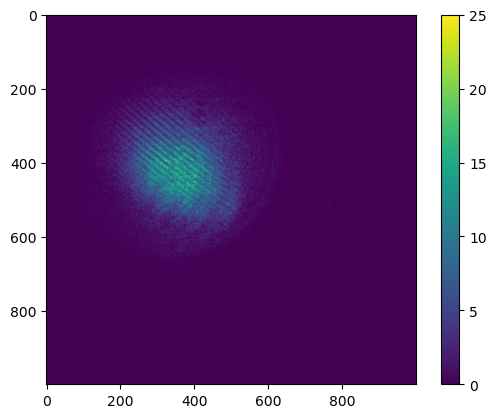

SizeX:  1000
SizeY:  1000
Gray value of first pixel:  0
SizeX:  1000
SizeY:  1000
Gray value of first pixel:  0
SizeX:  1000
SizeY:  1000
Gray value of first pixel:  0


In [78]:
from pypylon import pylon
import matplotlib.pyplot as plt
# from matplotlib import colormaps
import tifffile as tiff
import numpy as np
import skimage

camera = pylon.InstantCamera(pylon.TlFactory.GetInstance().CreateFirstDevice())

camera.Open()

# print(camera.IsOpen())

camera.StartGrabbing()
grabResult = camera.RetrieveResult(500000, pylon.TimeoutHandling_ThrowException)#ExposureTime as first input
img = grabResult.Array
plt.imshow(img)
plt.colorbar()
plt.savefig("test_imag.png")
plt.show()
grabResult.Release()
camera.StopGrabbing()

numberOfImagesToGrab = 3

camera.StartGrabbingMax(numberOfImagesToGrab)

pics=[]

while camera.IsGrabbing():
    grabResult = camera.RetrieveResult(500000, pylon.TimeoutHandling_ThrowException)#ExposureTime as first input

    if grabResult.GrabSucceeded():
        # Access the image data.
        print("SizeX: ", grabResult.Width)
        print("SizeY: ", grabResult.Height)
        img = grabResult.Array
        print("Gray value of first pixel: ", img[0, 0])

        # plt.imshow(img, cmap= "gray")
        # plt.colorbar()
        
        # plt.show()

        pics.append(img)
        grabResult.Release()

tiff.imwrite('pics.tif', pics)

camera.StopGrabbing()

camera.TriggerSource.SetValue("Line1")
camera.TriggerMode.SetValue("On")
camera.Close()

Start acquiring
Waiting for trigger...
Camera acquiring:
Picture number  0
Max Intensity: 3637


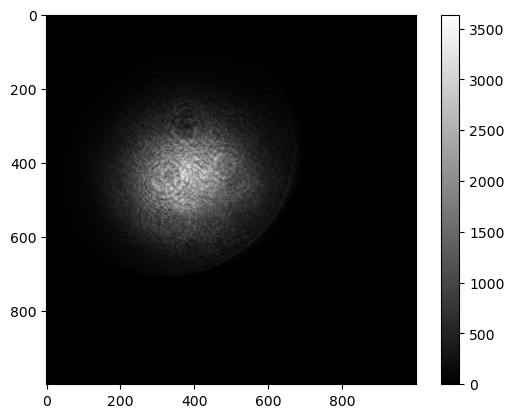

Camera acquiring:
Picture number  1
Max Intensity: 3687


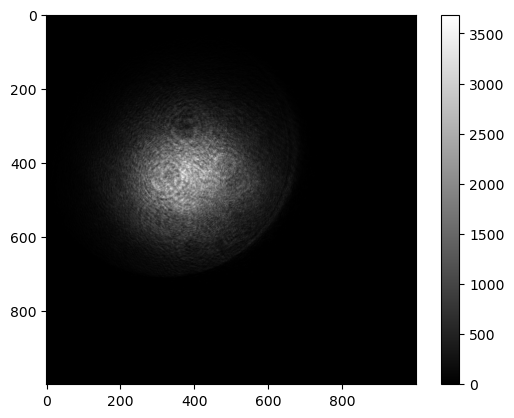

Camera acquiring:
Picture number  2
Max Intensity: 27


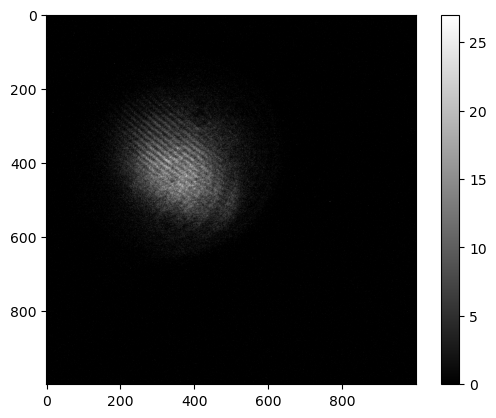

Camera acquiring:
Picture number  3
Max Intensity: 3604


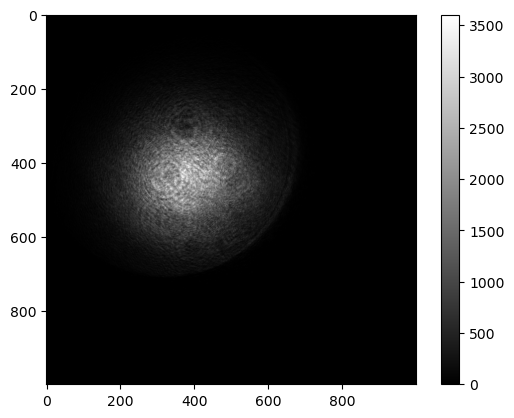

Camera acquiring:
Picture number  4
Max Intensity: 3711


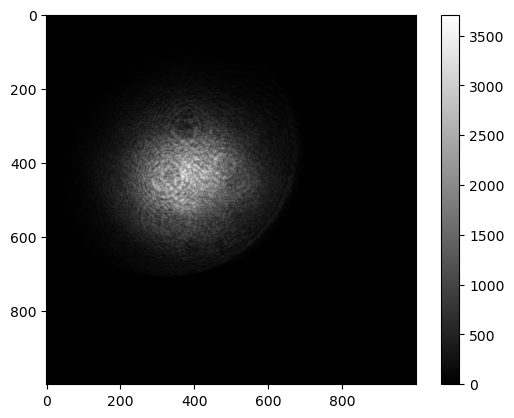

Camera acquiring:
Picture number  5
Max Intensity: 27


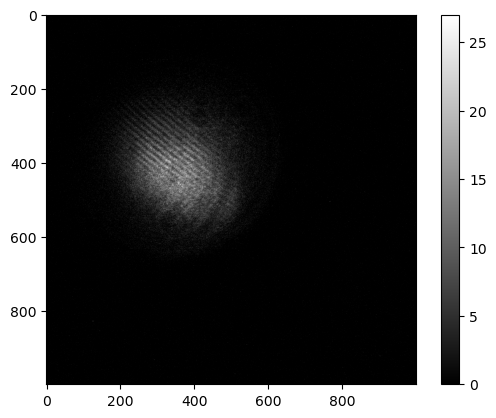

Camera acquiring:
Picture number  6
Max Intensity: 3658


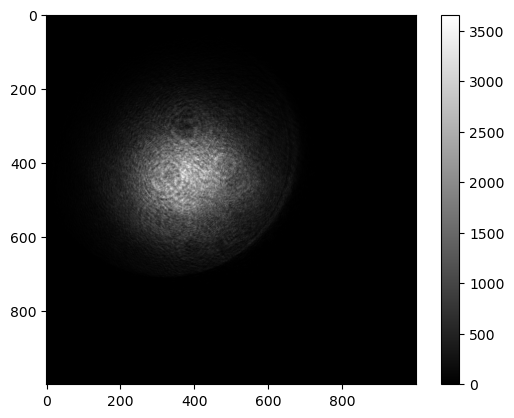

Camera acquiring:
Picture number  7
Max Intensity: 3689


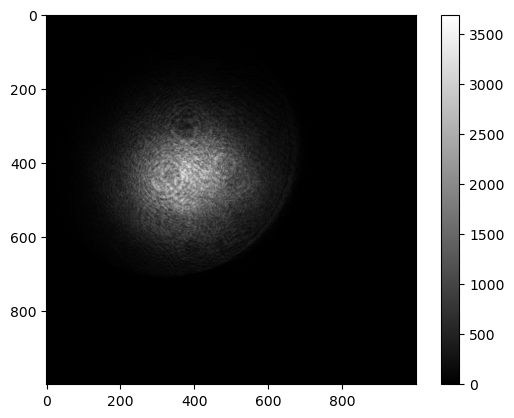

Camera acquiring:
Picture number  8
Max Intensity: 25


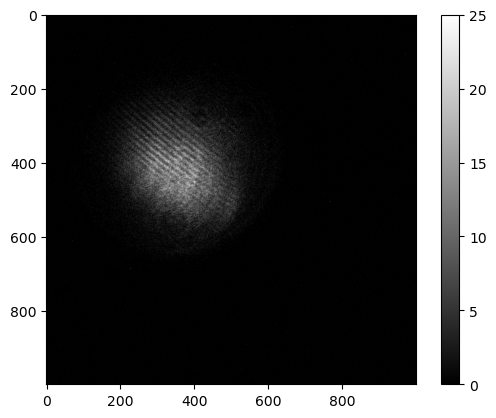

Camera acquiring:
Picture number  9
Max Intensity: 3642


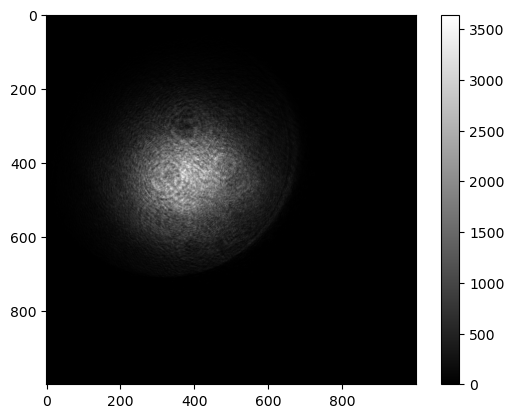

Camera acquiring:
Picture number  10
Max Intensity: 3504


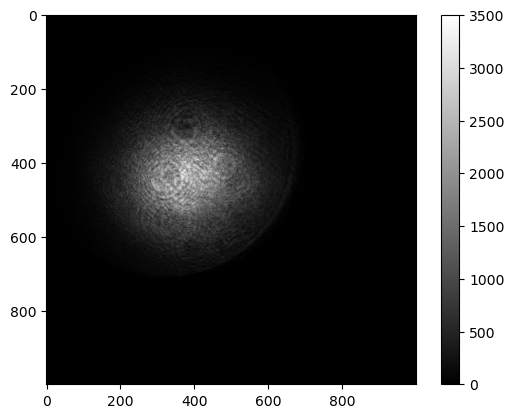

Camera acquiring:
Picture number  11
Max Intensity: 26


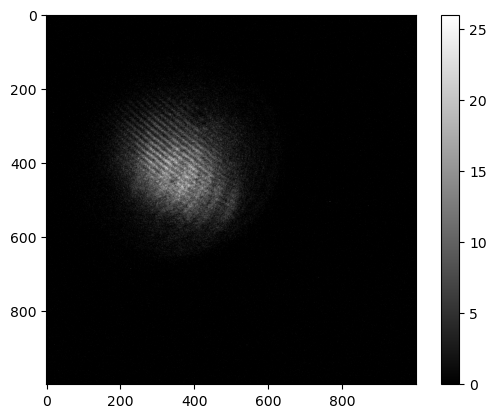

Camera acquiring:
Picture number  12
Max Intensity: 3629


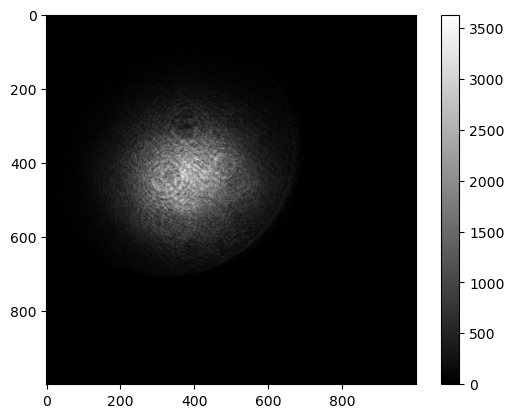

Camera acquiring:
Picture number  13
Max Intensity: 3745


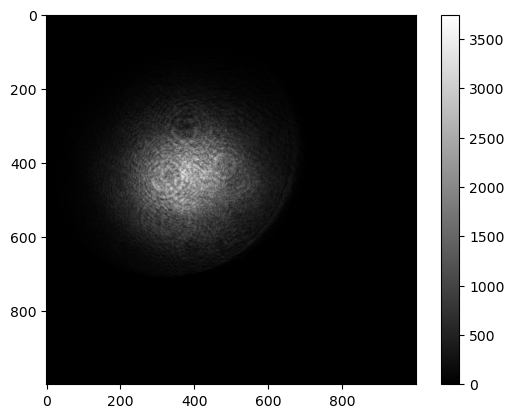

Camera acquiring:
Picture number  14
Max Intensity: 28


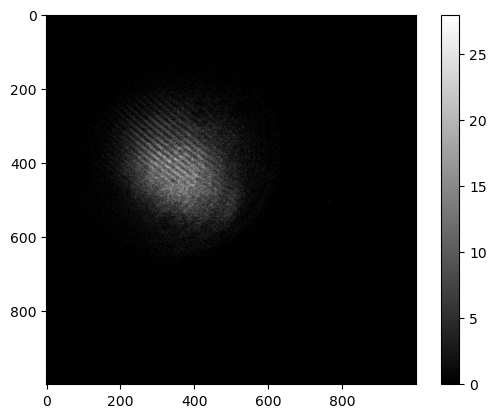

Camera acquiring:
Picture number  15
Max Intensity: 3590


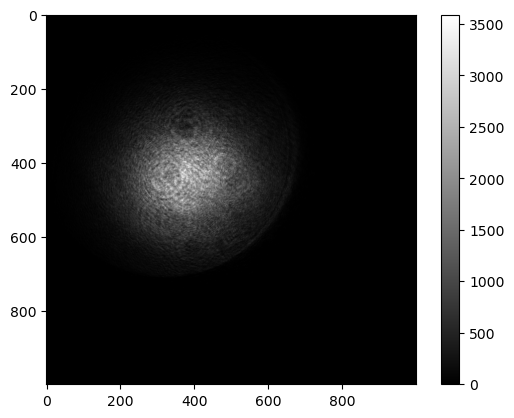

Camera acquiring:
Picture number  16
Max Intensity: 3625


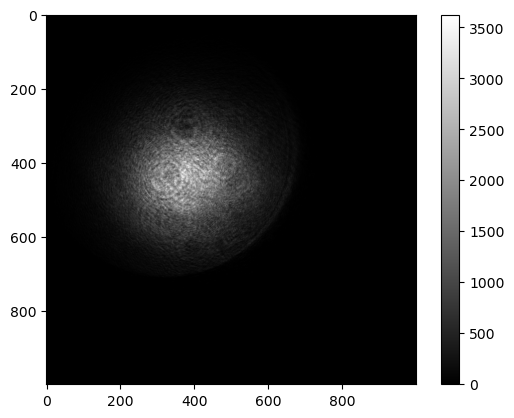

Camera acquiring:
Picture number  17
Max Intensity: 28


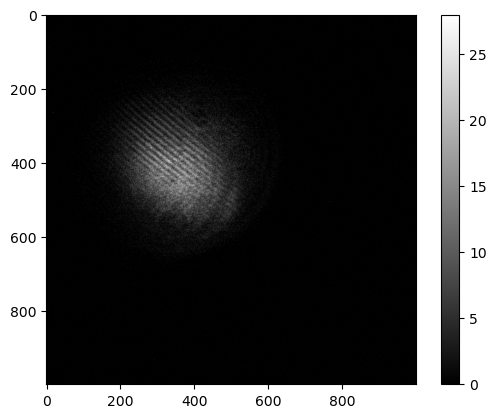

Camera acquiring:
Picture number  18
Max Intensity: 3529


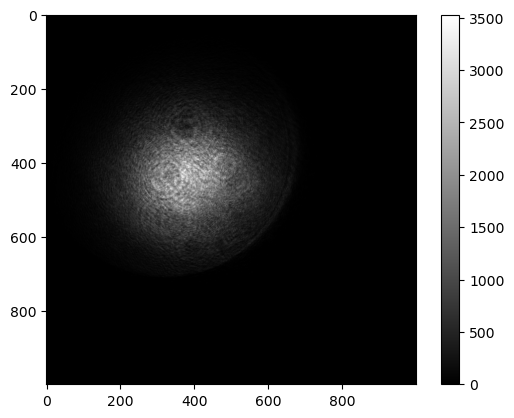

Camera acquiring:
Picture number  19
Max Intensity: 3559


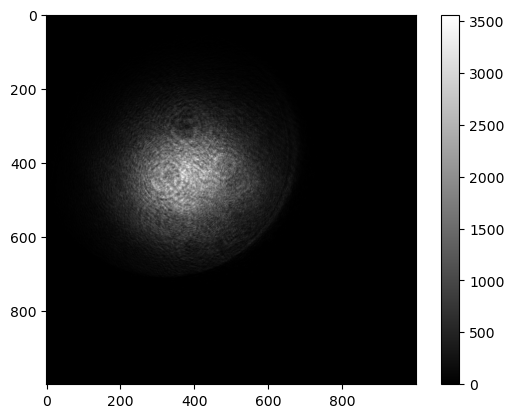

Camera acquiring:
Picture number  20
Max Intensity: 25


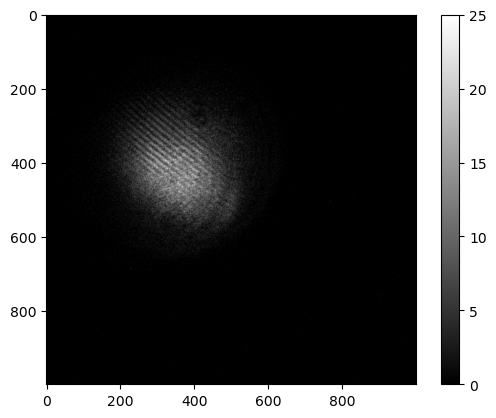

Acquisition process completed
Images meant to be taken:  21
Images succesfully taken:  21


C:\Users\florydberg01\AppData\Local\Temp\ipykernel_2360\52602239.py:84: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  imsave('test1.tif', Images)


In [79]:
#MAIN Acq Absorb
import numpy
from tifffile import imsave

camera.Open()
Numofpictures = 3
Numofruns = 7
Imagenum = 0  ### track image number
print('Start acquiring')
Images = []

# camera.LineSelector.SetValue("Line3")
# camera.LineMode.SetValue("Input")
# camera.LineSource.SetValue("FrameTriggerWait")

camera.LineSelector.SetValue("Line4")
camera.LineMode.SetValue("Output")
camera.LineSource.SetValue("ExposureActive")

camera.TriggerSelector.SetValue("FrameBurstStart")
camera.TriggerSource.SetValue("Line3")
camera.TriggerMode.SetValue("Off")

camera.TriggerSelector.SetValue("FrameStart")
camera.TriggerSource.SetValue("Line3")
# camera.TriggerActivation.SetValue("RisingEdge")
camera.TriggerMode.SetValue("On")


camera.ExposureTime.SetValue(432) #usec
camera.Gain.SetValue(0) #dB

camera.ShutterMode.SetValue('GlobalResetRelease')
# camera.ShutterMode.SetValue('Rolling')
# camera.BslLightControlTriggerMode.SetValue("ExposureActive")
camera.BslLightControlTriggerMode.SetValue("FlashWindow")
# print(camera.FlashWindowDuration.GetValue())
camera.PixelFormat.SetValue("Mono12")
# camera.BslSensorBitDepthMode.SetValue("Manual")
# camera.BslSensorBitDepth.SetValue("Bpp8")


camera.StartGrabbing()
print('Waiting for trigger...')

for Imagenum in range(Numofpictures*Numofruns):

    ###  A timeout of 10 s is used.
    grabResult = camera.RetrieveResult(50000, pylon.TimeoutHandling_ThrowException) # waiting time [ms]

    ### Print the index and the model name of the camera.
    cameraContextValue = grabResult.GetCameraContext()
    print("Camera acquiring:")


    if grabResult.GrabSucceeded():
        print('Picture number ', Imagenum)
        img = grabResult.Array
        print("Max Intensity:", numpy.amax(img))
        Images.append(img) 
        plt.imshow(img, cmap= "gray", vmin=0, vmax=np.amax(img))
        plt.colorbar()
        plt.savefig("BalserAcq%s.png"%(Imagenum))
        plt.show()


       

    else:
        print("Error: ", grabResult.ErrorCode, grabResult.ErrorDescription)
        grabResult.Release()
    
   #]for i in range(len(Images)):
     #   plt.imshow(Images[i], cmap= "gray", vmin=0, vmax=250)
      #  plt.colorbar()
       # plt.savefig("BalserAcq%s.png"%(Imagenum))
        #plt.show()
    

print('Acquisition process completed')
print('Images meant to be taken: ', Numofpictures*Numofruns)
print('Images succesfully taken: ', len(Images))

imsave('test1.tif', Images) 

camera.StopGrabbing()

camera.Close()

In [80]:

camera.Close()